# 알고리즘 개요



---



# 1.알고리즘이란?

## 알고리즘 성능 분석
- **연산량**： 알고리즘이 얼마나 적은 연산을 수행하는가?
- **메모리 사용량**： 얼마나 적은 메모리 공간을 사용하는가?

### @연산량 확인 방법

|연산량 확인 방법|설명|주요 도구|
|----|----|----|
|연산 횟수 직접 카운팅 |특정 코드에서 연산 횟수를 직접 세어 연산량을 측정 | 변수 사용 (count += 1)|
|Big-O 분석을 위한 타이머 활용 | 실행 시간을 여러 입력 크기에 대해 측정하여 시간 복잡도 분석 | time 모듈 (time.time()) |
|프로파일링 도구 활용 | 함수 실행 횟수, 실행 시간 분석 | cProfile, line-profiler |
|CPU 사용량 확인 |연산량이 CPU 사용률에 미치는 영향 분석 | psutil.cpu_percent() |



#### 1.연산 횟수 직접 카운팅
알고리즘 내에서 수행되는 주요 연산(반복문, 재귀 호출, 비교 연산 등)의 횟수 센다.</br>**(전역 변수 or 데코레이터 활용)**

In [3]:
# 버블 정렬의 연산 횟수 측정
import random

count = 0  # 연산 횟수 카운트

def bubble_sort(arr):
    global count
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            count += 1  # 비교 연산 횟수 증가
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

arr = [random.randint(0, 100) for _ in range(10)]
print(arr)
bubble_sort(arr)
print(f"Total Operations: {count}")

[30, 25, 5, 32, 20, 87, 32, 47, 26, 34]
Total Operations: 45


#### 2.Big-O 분석을 위한 타이머 활용
정렬 알고리즘의 실행 시간을 여러 크기의 입력에서 측정하여 Big-O 복잡도(O(n²), O(n log n) 등)를 분석할 수 있다.

In [6]:
# 정렬 알고리즘의 시간 복잡도 비교
import time
import random

def measure_time(sort_function, size):
    arr = [random.randint(0, 10000) for _ in range(size)]
    start = time.time()  # 시간 측정 시작
    sort_function(arr)
    end = time.time()    # 시간 측정 종료
    return end - start

sizes = [100, 500, 1000, 5000]
for size in sizes:
    print(f"Size {size}: Bubble Sort = {measure_time(bubble_sort, size):.6f} sec")


Size 100: Bubble Sort = 0.001650 sec
Size 500: Bubble Sort = 0.021761 sec
Size 1000: Bubble Sort = 0.039095 sec
Size 5000: Bubble Sort = 0.654624 sec


- 그래프로 표현

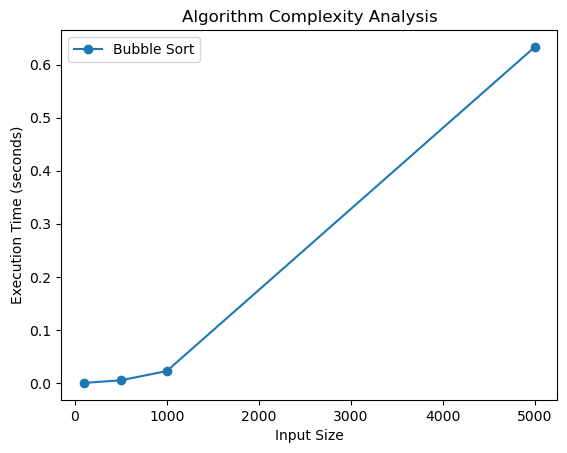

In [8]:
import time
import random
import matplotlib.pyplot as plt

def measure_time(sort_function, sizes):
    times = []
    for size in sizes:
        arr = [random.randint(0, 10000) for _ in range(size)]
        start = time.time()
        sort_function(arr)
        end = time.time()
        times.append(end - start)
    return times

sizes = [100, 500, 1000, 5000]
bubble_times = measure_time(bubble_sort, sizes)
plt.plot(sizes, bubble_times, label="Bubble Sort", marker='o')
plt.xlabel("Input Size")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.title("Algorithm Complexity Analysis")
plt.show()


#### 3.프로파일링 도구 활용
cProfile: 각 함수가 몇 번 호출되었는지와 실행 시간을 출력해 준다.

In [11]:
# cProfile을 이용한 함수 호출 수 측정
import cProfile

def test_function():
    total = 0
    for i in range(1000000):
        total += i
    return total

cProfile.run('test_function()')


         196 function calls (191 primitive calls) in 0.019 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.007    0.007    0.007    0.007 582566783.py:4(test_function)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1390(_handle_fromlist)
      2/1    0.006    0.003    0.007    0.007 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 attrsettr.py:42(__getattr__)
        1    0.000    0.000    0.000    0.000 attrsettr.py:65(_get_attr_opt)
        1    0.000    0.000    0.000    0.000 base_events.py:1894(_add_callback)
        2    0.000    0.000    0.000    0.000 base_events.py:734(time)
        1    0.000    0.000    0.000    0.000 decorator.py:199(fix)
        1    0.000    0.000    0.013    0.013 decorator.py:229(fun)
        6    0.000    0.000    0.000    0.000 enum.py:1129(__new__)
       12    0.000    0.000    0.000    0.000 enum.py:1544(_get_value)
        2

- line_profiler: 코드 라인별 연산량 확인

In [15]:
!pip install line-profiler

In [17]:
from line_profiler import LineProfiler

def test_function():
    total = 0
    for i in range(1000000):  # 연산량이 많은 부분
        total += i
    return total

lp = LineProfiler()
lp.add_function(test_function)

lp.enable()   # LineProfiler: 시작
test_function()
lp.disable()  # LineProfiler: 종료

lp.print_stats()


Timer unit: 1e-09 s

Total time: 0.110527 s
File: /var/folders/_0/7_vg_dq121q9klvwxq1rpt5m0000gn/T/ipykernel_2642/1868392818.py
Function: test_function at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
     3                                           def test_function():
     4         1       3000.0   3000.0      0.0      total = 0
     5   1000001   56084000.0     56.1     50.7      for i in range(1000000):  # 연산량이 많은 부분
     6   1000000   54440000.0     54.4     49.3          total += i
     7         1          0.0      0.0      0.0      return total



#### 4.CPU 사용량 확인

In [20]:
import psutil
import time

def test_function():
    total = 0
    for i in range(1000000):
        total += i
    return total

# CPU 및 메모리 사용량 측정
process = psutil.Process()
start_cpu = process.cpu_percent(interval=None)

start_time = time.time()
test_function()
end_time = time.time()

end_cpu = process.cpu_percent(interval=None)

print(f"Execution Time: {end_time - start_time:.6f} seconds")
print(f"CPU Usage: {end_cpu:.2f}%")


Execution Time: 0.045216 seconds
CPU Usage: 102.30%


### [실습문제] 정렬 알고리즘 시간 성능 분석
- bubble_sort, merge_sort, builtin_sort  사용
- sizes =  [100, 500, 1000, 5000, 10000] 임의의 정수 사용
- 각 알고리즘의 실행 시간(time) 측정하여 하나의 그래프에 시각화하기

In [51]:
# 버블 정렬 (느림)
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

# 병합 정렬 (중간)
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L, R = arr[:mid], arr[mid:]
        merge_sort(L)
        merge_sort(R)
        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

# 파이썬 내장 정렬 (빠름)
def builtin_sort(arr):
    arr.sort()




---



### @메모리 사용량 확인 방법


 |메모리 사용량 확인 방법 | 설명 | 주요 도구 |
 |--------- |---------- |----- |
|(전체 프로세스)메모리 사용량 측정 | 현재 실행 중인 프로세스가 사용하는 전체 메모리 크기 확인  | psutil.memory_info()  |
|(코드 라인별)메모리 사용량 측정 | 특정 코드 라인에서 사용된 메모리 크기를 분석하여 가장 많은 메모리를 차지하는 부분 확인 |memory_profiler |
|메모리 사용량 추적 | 프로그램 실행 중 메모리 변화량을 추적하여 메모리 증가 여부 분석 |tracemalloc |
|Garbage Collector 메모리 수거 확인|Python이 자동으로 해제하지 않은 메모리를 강제로 수거하여 메모리 최적화 확인 |  gc (Garbage Collector)|



#### 1.(전체 프로세스)메모리 사용량 측정

In [30]:
import psutil
import time

def memory_intensive_function():
    data = [i for i in range(10**7)]  # 큰 리스트 생성
    return sum(data)

# 현재 프로세스의 메모리 사용량 측정
# - rss:Resident Set Size, 현재 프로세스가 실제로 물리적 RAM에서 차지하고 있는 메모리 크기
process = psutil.Process()
start_memory = process.memory_info().rss / (1024 * 1024)  # MB 단위

start_time = time.time()
memory_intensive_function()
end_time = time.time()

end_memory = process.memory_info().rss / (1024 * 1024)  # MB 단위

print(f"Memory Usage Before: {start_memory:.2f} MB")
print(f"Memory Usage After: {end_memory:.2f} MB")
print(f"Memory Increased: {end_memory - start_memory:.2f} MB")
print(f"Execution Time: {end_time - start_time:.6f} sec")


Memory Usage Before: 188.05 MB
Memory Usage After: 197.30 MB
Memory Increased: 9.25 MB
Execution Time: 0.202998 sec


#### 2.(코드 라인별)메모리 사용량 측정

In [33]:
!pip install memory_profiler

In [34]:
from memory_profiler import memory_usage
import time

def memory_intensive_function():
    data = [i for i in range(10**6)]  # 큰 리스트 생성
    total = sum(data)
    return total

# 메모리 사용량 측정
mem_usage, _ = memory_usage((memory_intensive_function, ), interval=0.1, retval=True)
print(f"Peak Memory Usage: {max(mem_usage):.2f} MB")


Peak Memory Usage: 255.41 MB


In [35]:
'''
이 코드는 코랩에서는 IPython 환경과 호환되지 않아서 오류가 발생함
PC 파이썬 인터프리터에서 실행
- 각 코드 라인이 얼마나 많은 메모리를 사용하는지 확인 가능
'''
from memory_profiler import profile

@profile
def memory_intensive_function():
    data = [i for i in range(10**6)]  # 큰 리스트 생성
    total = sum(data)
    return total

memory_intensive_function()


ERROR: Could not find file /var/folders/_0/7_vg_dq121q9klvwxq1rpt5m0000gn/T/ipykernel_2642/279801940.py


499999500000

#### 3.메모리 사용량 추적

In [38]:
'''
메모리 증가량을 추적하고, 프로그램이 가장 많은 메모리를 사용할 때를 확인 가능
'''
import tracemalloc

def memory_intensive_function():
    data = [i for i in range(10**6)]  # 큰 리스트 생성
    return sum(data)

# 메모리 사용량 추적 시작
tracemalloc.start()

memory_intensive_function()

# 메모리 사용량 확인
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage: {current / (1024 * 1024):.2f} MB")
print(f"Peak memory usage: {peak / (1024 * 1024):.2f} MB")

# 메모리 추적 종료
tracemalloc.stop()


Current memory usage: 0.00 MB
Peak memory usage: 38.57 MB


#### 4.Garbage Collector 메모리 수거 확인

In [42]:
import gc
import psutil

def create_large_data():
    return [i for i in range(10**6)]  # 큰 리스트 생성

process = psutil.Process()
print(f"Memory Before: {process.memory_info().rss / (1024 * 1024):.2f} MB")

data = create_large_data()

print(f"Memory After: {process.memory_info().rss / (1024 * 1024):.2f} MB")

del data  # 메모리 해제
gc.collect()  # 가비지 컬렉션 실행

print(f"Memory After GC: {process.memory_info().rss / (1024 * 1024):.2f} MB")


Memory Before: 319.53 MB
Memory After: 339.42 MB
Memory After GC: 319.58 MB




---



### [실습문제] 정렬 알고리즘 성능 분석 (시간, 메모리)
- bubble_sort, merge_sort, builtin_sort  사용
- sizes =  [100, 500, 1000, 5000, 10000] 임의의 정수 사용
- 실행 시간(time), 전체 메모리 사용량 측정하여  그래프에 시각화하기

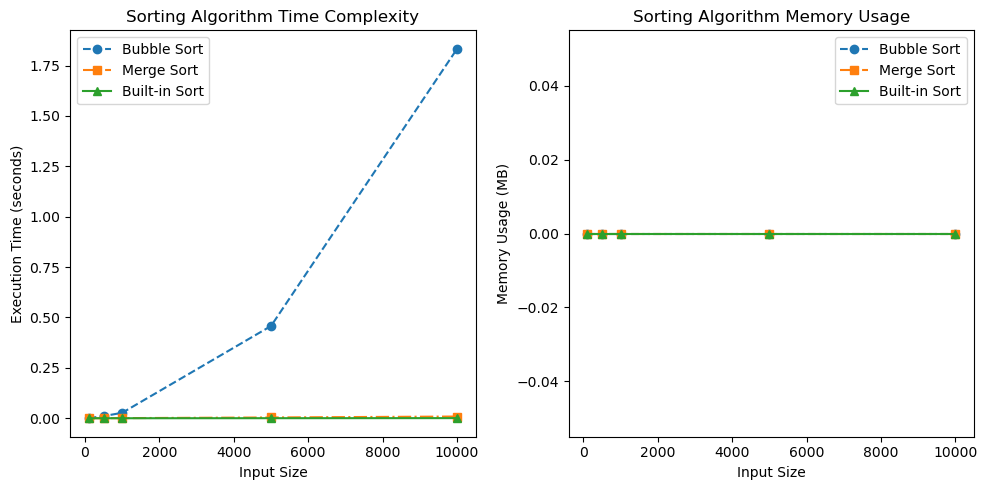

In [59]:
import time
import random
import matplotlib.pyplot as plt
import psutil

# === Bubble Sort ===
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

# === Merge Sort ===
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

# === 내장 정렬 함수 (Built-in Sort) ===
def builtin_sort(arr):
    return sorted(arr)

# === 메모리 사용량 측정 ===
def measure_memory(sort_function, sizes):
    memory_usages = []
    for size in sizes:
        arr = [random.randint(0, 10000) for _ in range(size)]
        
        # 메모리 사용량 측정 시작
        process = psutil.Process()
        start_memory = process.memory_info().rss / (1024 * 1024)  # MB 단위
        
        start = time.time()
        if sort_function == merge_sort:
            sort_function(arr)  # merge_sort는 새 배열을 반환하므로 그냥 호출
        else:
            sort_function(arr.copy())  # 다른 정렬 함수들은 제자리 정렬 가능성이 있으므로 복사본 사용
        end = time.time()
        
        # 메모리 사용량 측정 종료
        end_memory = process.memory_info().rss / (1024 * 1024)  # MB 단위
        
        memory_usages.append(end_memory - start_memory)  # 메모리 차이 기록
    return memory_usages

# === 시간 측정 ===
def measure_time(sort_function, sizes):
    times = []
    for size in sizes:
        arr = [random.randint(0, 10000) for _ in range(size)]
        start = time.time()
        if sort_function == merge_sort:
            sort_function(arr)  # merge_sort는 새 배열을 반환하므로 그냥 호출
        else:
            sort_function(arr.copy())  # 다른 정렬 함수들은 제자리 정렬 가능성이 있으므로 복사본 사용
        end = time.time()
        times.append(end - start)
    return times

# === 입력 크기 설정 ===
sizes = [100, 500, 1000, 5000, 10000]

# === 정렬 알고리즘별 실행 시간 측정 ===
bubble_times = measure_time(bubble_sort, sizes)
merge_times = measure_time(merge_sort, sizes)
builtin_times = measure_time(builtin_sort, sizes)

# === 정렬 알고리즘별 메모리 사용량 측정 ===
bubble_memory = measure_memory(bubble_sort, sizes)
merge_memory = measure_memory(merge_sort, sizes)
builtin_memory = measure_memory(builtin_sort, sizes)

# === 그래프 시각화 ===
# 시간 그래프
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(sizes, bubble_times, label="Bubble Sort", marker='o', linestyle='--')
plt.plot(sizes, merge_times, label="Merge Sort", marker='s', linestyle='-.')
plt.plot(sizes, builtin_times, label="Built-in Sort", marker='^', linestyle='-')
plt.xlabel("Input Size")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.title("Sorting Algorithm Time Complexity")

# 메모리 사용량 그래프
plt.subplot(1, 2, 2)
plt.plot(sizes, bubble_memory, label="Bubble Sort", marker='o', linestyle='--')
plt.plot(sizes, merge_memory, label="Merge Sort", marker='s', linestyle='-.')
plt.plot(sizes, builtin_memory, label="Built-in Sort", marker='^', linestyle='-')
plt.xlabel("Input Size")
plt.ylabel("Memory Usage (MB)")
plt.legend()
plt.title("Sorting Algorithm Memory Usage")

plt.tight_layout()
plt.show()
